# Causal Networks, Independence

From [http://openonlinecourses.com/causalanalysis/CausalNetworks.asp](http://openonlinecourses.com/causalanalysis/CausalNetworks.asp).

## Question 1

Draw networks based on the following independence assumptions.

### Question 1.1 I(X, Y)

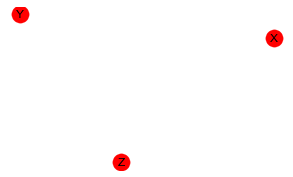

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use('seaborn')

def draw_graph(ax, nodes, edges):
    g = nx.DiGraph()
    
    for n in nodes:
        g.add_node(n)
    
    for u, v in edges:
        g.add_edge(u, v)
    
    nx.draw(**{
        'G': g,
        'ax': ax,
        'pos': nx.spring_layout(g),
        'with_labels': True,
        'node_color': 'r'
    })
    
fig, ax = plt.subplots(figsize=(5, 3))
draw_graph(ax, ['X', 'Y', 'Z'], [])

### Question 1.2 I(X, Y), Not I(X,Y|Z)

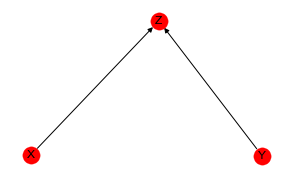

In [2]:
fig, ax = plt.subplots(figsize=(5, 3))
draw_graph(ax, ['X', 'Y', 'Z'], [('X', 'Z'), ('Y', 'Z')])

### Question 1.3 I(X, Y), I(X,Y|Z), Y measured last

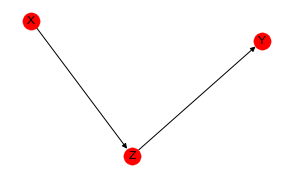

In [3]:
fig, ax = plt.subplots(figsize=(5, 3))
draw_graph(ax, ['X', 'Y', 'Z'], [('X', 'Z'), ('Z', 'Y')])

### Question 1.4 I(X, Y), I(X,Y|Z), I({X,Y}, W | Z), W measured last

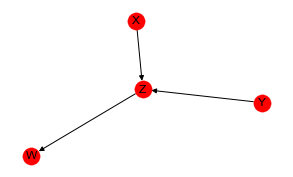

In [4]:
fig, ax = plt.subplots(figsize=(5, 3))
draw_graph(ax, ['X', 'Y', 'Z', 'W'], [('X', 'Z'), ('Y', 'Z'), ('Z', 'W')])

### Question 1.5 I(X,Y), I(Z,W), and X measured before Z and Y measured before W

Try this on your own.

## Question 3

## Build the network

In [5]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController
from pybbn.generator.bbngenerator import convert_for_drawing

s = BbnNode(Variable(0, 'Severity', ['severe', 'not_severe']), [0.4, 0.6])
d = BbnNode(Variable(1, 'DNR', ['yes', 'no']), [0.1, 0.9])
t = BbnNode(Variable(2, 'Treatment', ['yes', 'no']), [0.1, 0.9, 0.3, 0.7, 0.2, 0.8, 0.4, 0.6])
o = BbnNode(Variable(3, 'Outcome', ['negative', 'positive']), [0.8, 0.2, 0.9, 0.1, 0.6, 0.4, 0.7, 0.3])

bbn = Bbn() \
    .add_node(s) \
    .add_node(d) \
    .add_node(t) \
    .add_node(o) \
    .add_edge(Edge(s, t, EdgeType.DIRECTED)) \
    .add_edge(Edge(d, t, EdgeType.DIRECTED)) \
    .add_edge(Edge(s, o, EdgeType.DIRECTED)) \
    .add_edge(Edge(t, o, EdgeType.DIRECTED))

### Draw the network

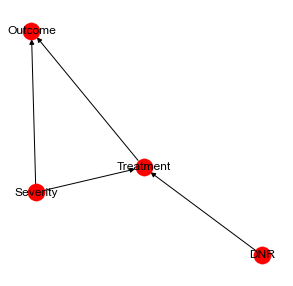

In [6]:
g = convert_for_drawing(bbn)

fig, ax = plt.subplots(figsize=(5, 5))

nx.draw(**{
    'G': g,
    'ax': ax,
    'pos': nx.spring_layout(g),
    'with_labels': True,
    'labels': {n.variable.id: n.variable.name for n in [s, d, t, o]},
    'node_color': 'r'
})

### Perform inference with evidence

In [7]:
from pybbn.graph.jointree import EvidenceBuilder

join_tree = InferenceController.apply(bbn)

ev1 = EvidenceBuilder() \
        .with_node(join_tree.get_bbn_node_by_name('Severity')) \
        .with_evidence('severe', 1.0) \
        .build()
ev2 = EvidenceBuilder() \
        .with_node(join_tree.get_bbn_node_by_name('DNR')) \
        .with_evidence('yes', 1.0) \
        .build()
evidences = [ev1, ev2]

join_tree.update_evidences(evidences);

for node, posteriors in join_tree.get_posteriors().items():
    p = ', '.join([f'{val}={prob:.5f}' for val, prob in posteriors.items()])
    print(f'{node} : {p}')

Severity : severe=1.00000, not_severe=0.00000
Treatment : yes=0.10000, no=0.90000
DNR : yes=1.00000, no=0.00000
Outcome : negative=0.89000, positive=0.11000
